### Pearson’s Correlation Between Experimental Properties and DC

In [4]:
# Import dependencies
import pandas as pd
import numpy as np

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [16]:
# Replace this with the path to your Excel file
data_file = 'C:/Users/jhyan/Documents/all/Li_research/projects/pa_membrane/Polyamide Membrane Database/select_pa_mem XPS-v2.xlsx'

# Load data from the specified Excel file into a Pandas DataFrame
# This assumes the data is in the first sheet of the Excel file, you might need to adjust 'sheet_name'
df = pd.read_excel(data_file, sheet_name=0, header=1)

# Print the column names
print(df.columns)

Index(['O/N\n(%)', 'F (L m-2  h-1\nbar-1)', 'R (NaCl)\n(%)',
       'B (NaCl)\n(L m-2  h-1)', 'Ref.'],
      dtype='object')


In [17]:
# Filter the data to ignore O/N values below 0.77 and above 2.0
df_filtered = df[(df['O/N\n(%)'] >= 0.77) & (df['O/N\n(%)'] <= 2.0)]

# Print the number of rows in the filtered DataFrame
print(f"Number of rows in the filtered DataFrame: {df_filtered.shape[0]}")

Number of rows in the filtered DataFrame: 263


In [21]:
# Define the functions to calculate DC1 and DC2 based on O/N
def calculate_dc1(r_on):
    return (4 - 2 * r_on) / (1 + r_on)

def calculate_dc2(r_on):
    return 1 / (1.89069458 * r_on - 0.46851556)

# Apply the functions to calculate DC1 and DC2
df_filtered['DC1'] = df_filtered['O/N\n(%)'].apply(calculate_dc1)
df_filtered['DC2'] = df_filtered['O/N\n(%)'].apply(calculate_dc2)

# Calculate Pearson's correlation between DC1 and DC2
pearson_correlation = pearsonr(df_filtered['DC1'], df_filtered['DC2'])

print(f"Pearson's correlation coefficient between DC1 and DC2 is: {pearson_correlation[0]}")
print(f"P-value of the correlation is: {pearson_correlation[1]}")


Pearson's correlation coefficient between DC1 and DC2 is: 0.9886133298264694
P-value of the correlation is: 1.0440805183957371e-216


C:\Users\jhyan\AppData\Local\Temp\ipykernel_20288\3898543497.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DC1'] = df_filtered['O/N\n(%)'].apply(calculate_dc1)
C:\Users\jhyan\AppData\Local\Temp\ipykernel_20288\3898543497.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DC2'] = df_filtered['O/N\n(%)'].apply(calculate_dc2)


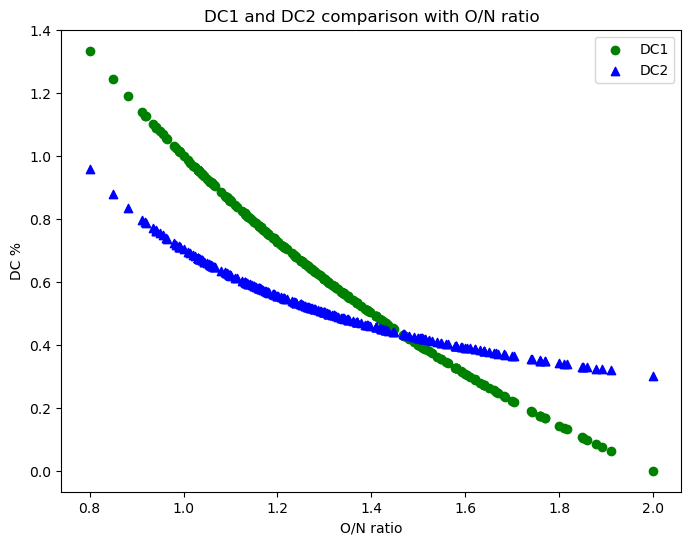

In [23]:
# Plotting the data
plt.figure(figsize=(8, 6))

# Plot DC1
plt.scatter(df_filtered['O/N\n(%)'], df_filtered['DC1'], label='DC1', color='green', linestyle='None', marker='o')

# Plot DC2
plt.scatter(df_filtered['O/N\n(%)'], df_filtered['DC2'], label='DC2', color='blue', linestyle='None', marker='^')

# Add legend, labels, and title
plt.legend()
plt.xlabel('O/N ratio')
plt.ylabel('DC %')
plt.title('DC1 and DC2 comparison with O/N ratio')

# Show plot
plt.show()